<a href="https://colab.research.google.com/github/sebekpro/python-ds/blob/main/06_uczenie_maszynowe/08_drzewo_decyzyjne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* @author: krakowiakpawel9@gmail.com  
* @site: e-smartdata.org

### scikit-learn
>Strona biblioteki: [https://scikit-learn.org](https://scikit-learn.org)  
>
>Dokumentacja/User Guide: [https://scikit-learn.org/stable/user_guide.html](https://scikit-learn.org/stable/user_guide.html)
>
>Podstawowa biblioteka do uczenia maszynowego w języku Python.
>
>Aby zainstalować bibliotekę scikit-learn, użyj polecenia poniżej:
```
pip install scikit-learn
```

### Spis treści:
1. [Import bibliotek](#1)
2. [Załadowanie danych](#2)
3. [Eksploracja danych](#3)
4. [Przygotowanie danych do modelu](#4)
5. [Budowa klasyfikatora drzewa decyzyjnego](#5)
6. [Graf drzewa decyzyjnego](#6)
7. [Budowa funkcji dla modelu drzewa decyzyjnego](#7)

### <a name='1'></a> Import bibliotek

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from IPython.display import Image

sns.set()
np.random.seed(10)

### <a name='2'></a> Załadowanie danych

In [ ]:
iris = load_iris()
data = iris.data
targets = iris.target
feature_names = [name.replace(' ', '_')[:-5] for name in iris.feature_names]
class_names = iris.target_names

print(f'Liczba próbek: {len(data)}')
print(f'Kształt danych: {data.shape}')
print(f'Nazwy zmiennych objaśniających: {feature_names}')
print(f'Nazwy kategorii kosaćca: {class_names}')

Liczba próbek: 150
Kształt danych: (150, 4)
Nazwy zmiennych objaśniających: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Nazwy kategorii kosaćca: ['setosa' 'versicolor' 'virginica']


### <a name='3'></a> Eksploracja danych
Iris Setosa

In [ ]:
Image(url='https://ml-repository-krakers.s3-eu-west-1.amazonaws.com/decision_tree_course/graphs/Iris_setosa.jpg', width=200)

Iris Versicolor

In [ ]:
Image(url='https://ml-repository-krakers.s3-eu-west-1.amazonaws.com/decision_tree_course/graphs/Iris_versicolor.jpg', width=200)

Iris Virginica

In [ ]:
Image(url='https://ml-repository-krakers.s3-eu-west-1.amazonaws.com/decision_tree_course/graphs/Iris_virginica.jpg', width=200)

In [ ]:
data_targets = np.c_[data, targets]
df = pd.DataFrame(data_targets, columns=feature_names + ['class'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [ ]:
df.describe().T.apply(lambda x: round(x, 2))

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.84,0.83,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.06,0.44,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.76,1.77,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.20,0.76,0.1,0.3,1.30,1.8,2.5
class,150.0,1.00,0.82,0.0,0.0,1.00,2.0,2.0


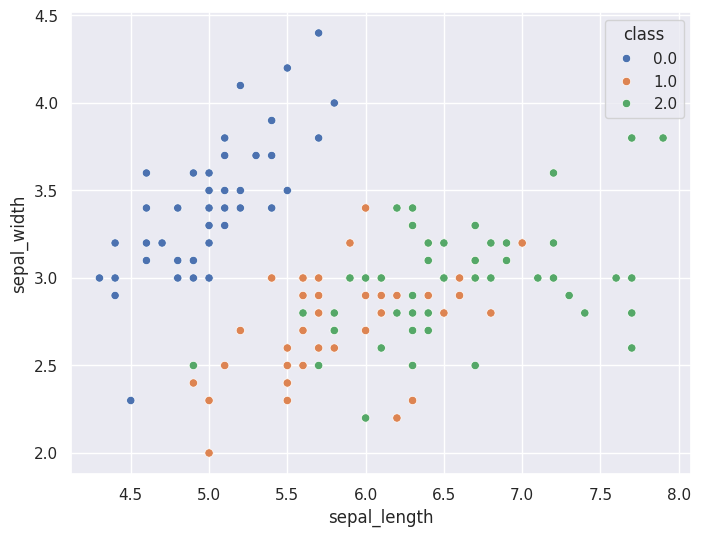

In [ ]:
plt.figure(figsize=(8, 6))
_ = sns.scatterplot(x = 'sepal_length', y = 'sepal_width', hue='class', data=df, legend='full', palette=sns.color_palette()[:3])

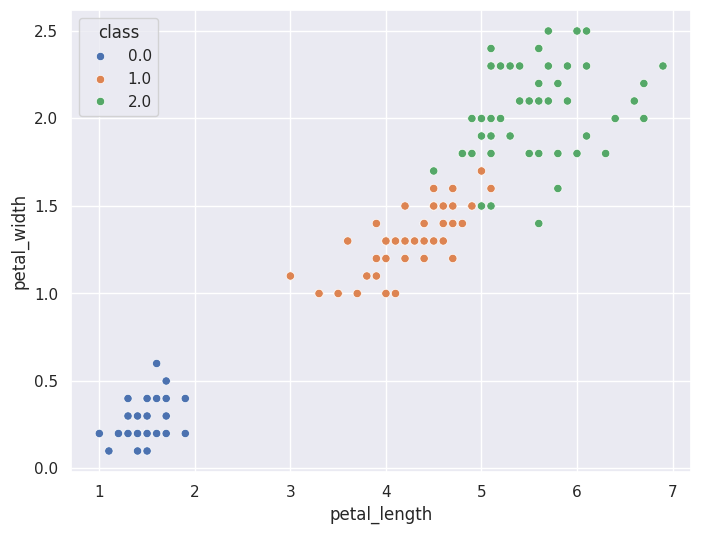

In [ ]:
plt.figure(figsize=(8, 6))
_ = sns.scatterplot(x = 'petal_length', y = 'petal_width', hue='class', data=df, legend='full', palette=sns.color_palette()[:3])

In [ ]:
df['class'].value_counts()

,count
class,
0.0,50
1.0,50
2.0,50


### <a name='4'></a> Przygotowanie danych do modelu

In [ ]:
X = df.copy()
X = X[['petal_length', 'petal_width', 'class']]
y = X.pop('class')

In [ ]:
X.head()

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [ ]:
y.head()

,class
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [ ]:
X = X.values
y = y.values.astype('int16')

### <a name='5'></a> Budowa klasyfikatora drzewa decyzyjnego
- max_depth=1


In [ ]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(max_depth=1, random_state=30)
classifier.fit(X, y)

DecisionTreeClassifier(max_depth=1, random_state=30)

Wykreślenie granic decyzyjnych

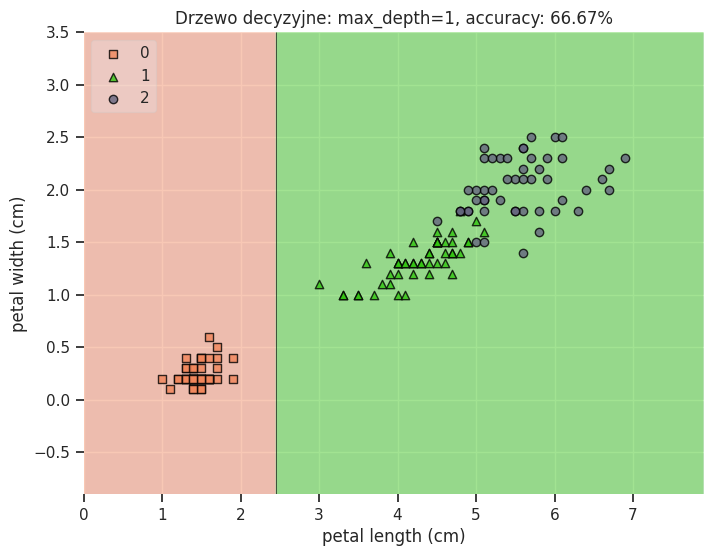

In [ ]:
from mlxtend.plotting import plot_decision_regions

colors='#f1865b,#31c30f,#64647F,#d62728,#9467bd,#8c564b,#e377c2,#7f7f7f,#bcbd22,#17becf'

acc = classifier.score(X, y)

plt.figure(figsize=(8, 6))
plot_decision_regions(X, y, classifier, legend=2, colors=colors)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.title(f'Drzewo decyzyjne: max_depth=1, accuracy: {acc * 100:.2f}%')
plt.show()

### <a name='6'></a>  Graf drzewa decyzyjnego
- max_depth = 1

In [ ]:
from sklearn.tree import export_graphviz

export_graphviz(classifier,
               out_file='iris_tree.dot',
               feature_names=iris.feature_names[2:],
               class_names=iris.target_names,
               rounded=True,
               filled=True)

Wyświetlenie grafu drzewa decyzyjnego

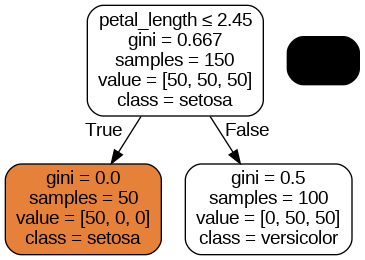

In [ ]:
from io import StringIO  # Standardowa biblioteka Pythona
from IPython.display import Image
import pydotplus
from sklearn.tree import export_graphviz

dot_data = StringIO()
export_graphviz(classifier,
               out_file=dot_data,
               feature_names=feature_names[2:],
               class_names=class_names,
               special_characters=True,
               rounded=True,
               filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('graph.png')
Image(graph.create_png(), width=250)

### <a name='7'></a> Budowa funkcji dla modelu drzewa decyzyjnego

In [ ]:
def make_decision_tree(max_depth=1):
    # trenowanie modelu
    classifier = DecisionTreeClassifier(max_depth=max_depth, random_state=30)
    classifier.fit(X, y)

    # eksport grafu drzewa
    dot_data = StringIO()
    export_graphviz(classifier,
                   out_file=dot_data,
                   feature_names=feature_names[2:],
                   class_names=class_names,
                   special_characters=True,
                   rounded=True,
                   filled=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    graph.write_png('graph.png')

    # obliczenie dokładności
    acc = classifier.score(X, y)

    # wykreślenie granic decyzyjnych
    colors='#f1865b,#31c30f,#64647F,#d62728,#9467bd,#8c564b,#e377c2,#7f7f7f,#bcbd22,#17becf'
    plt.figure(figsize=(8, 6))
    ax = plot_decision_regions(X, y, classifier, legend=0, colors=colors)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, ['setosa', 'versicolor', 'virginica'], framealpha=0.3)
    plt.xlabel('petal length (cm)')
    plt.ylabel('petal width (cm)')
    plt.title(f'Drzewo decyzyjne: max_depth={max_depth}, accuracy={acc * 100:.2f}')

    return Image(graph.create_png(), width=150 + max_depth * 80)


- max_depth=2


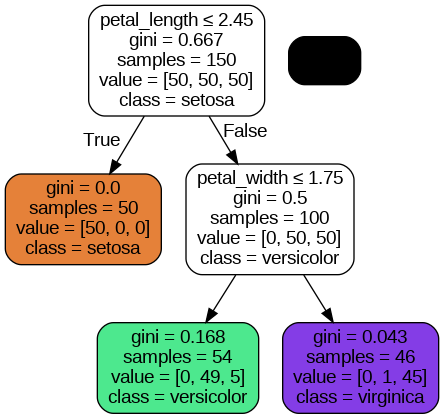

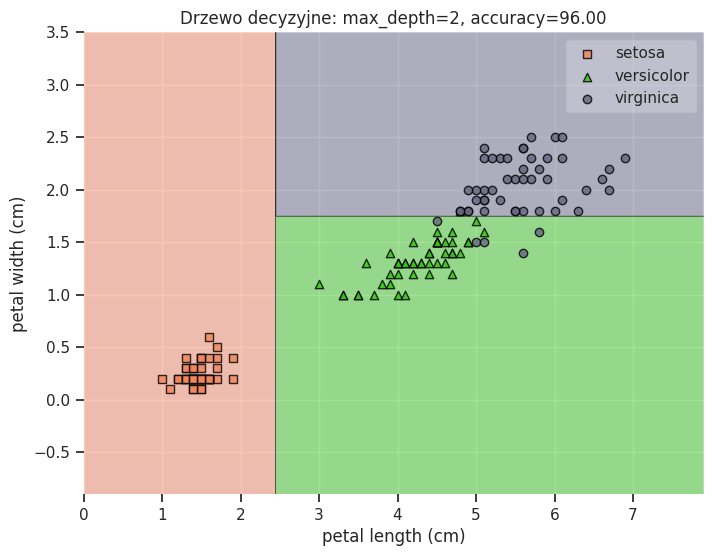

In [ ]:
make_decision_tree(max_depth=2)

- max_depth=3

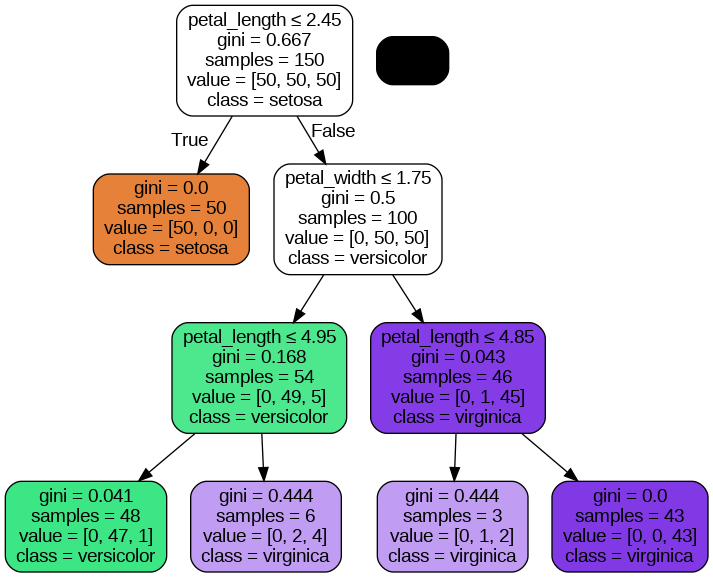

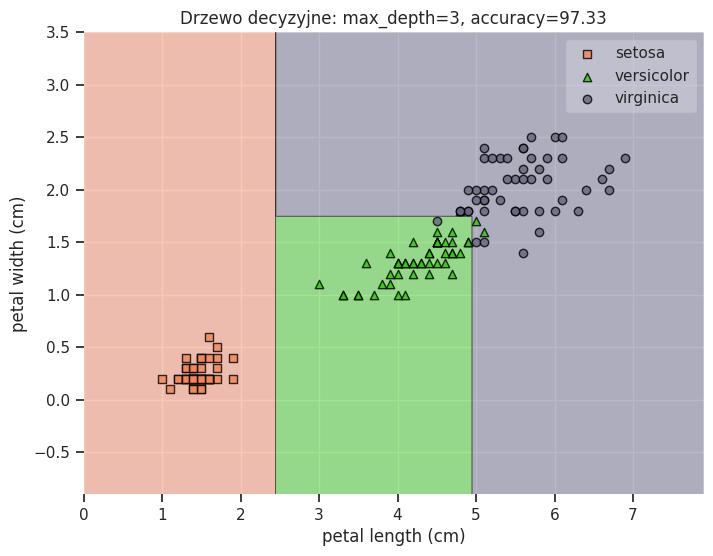

In [ ]:
make_decision_tree(max_depth=3)

- max_depth=4

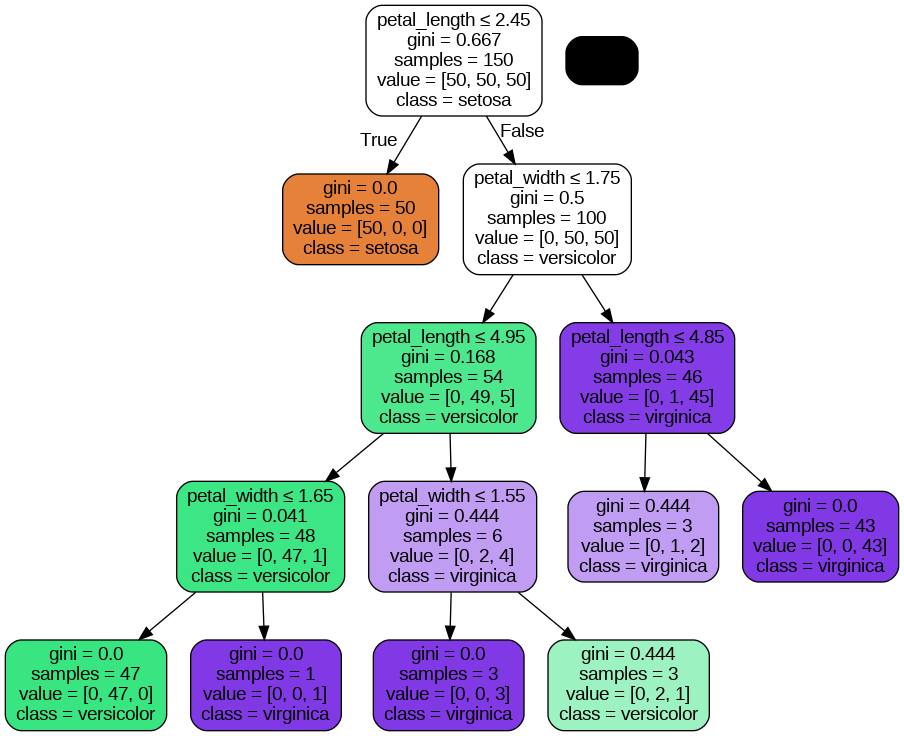

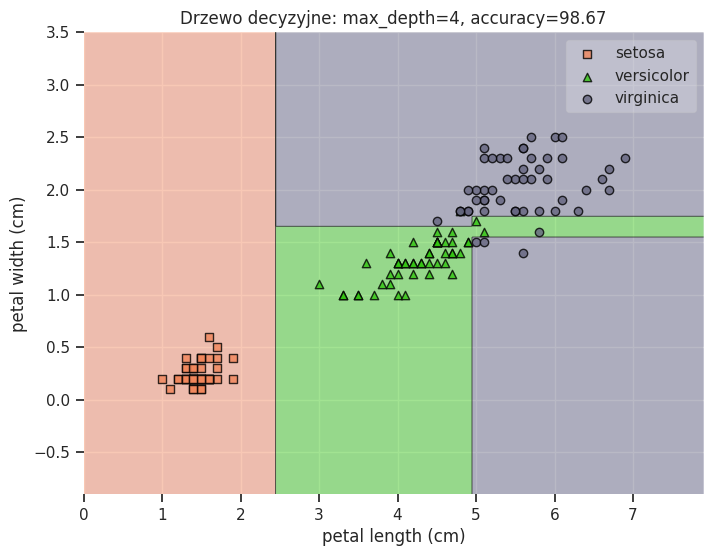

In [ ]:
make_decision_tree(max_depth=4)

- max_depth=5

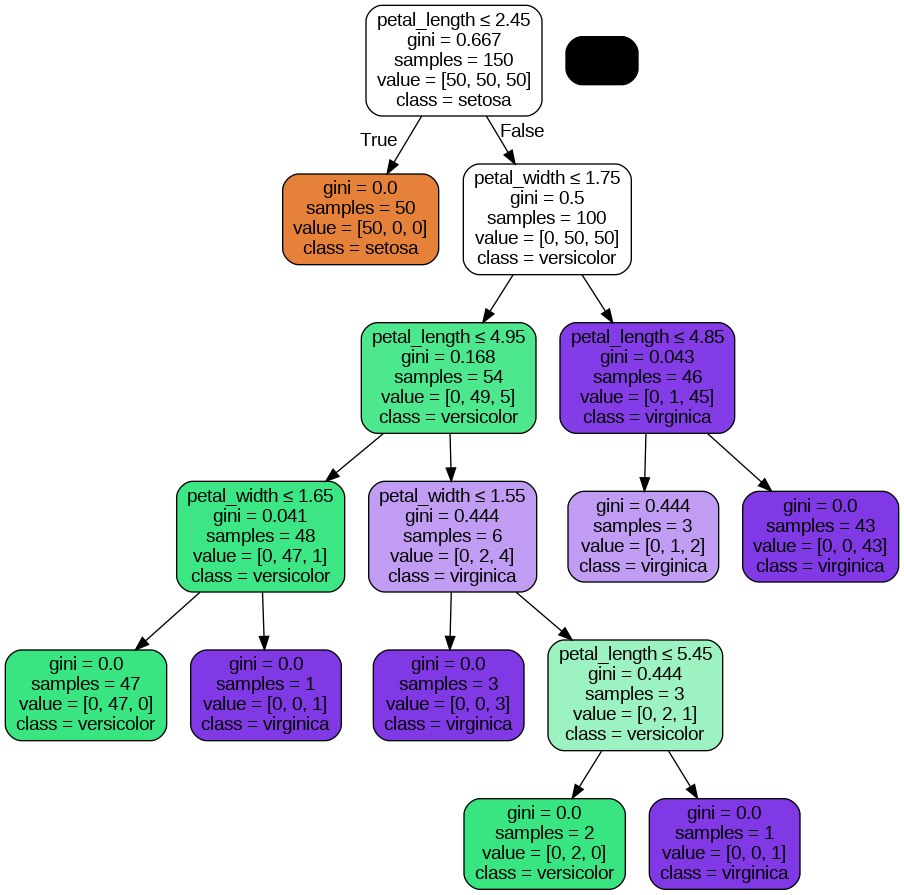

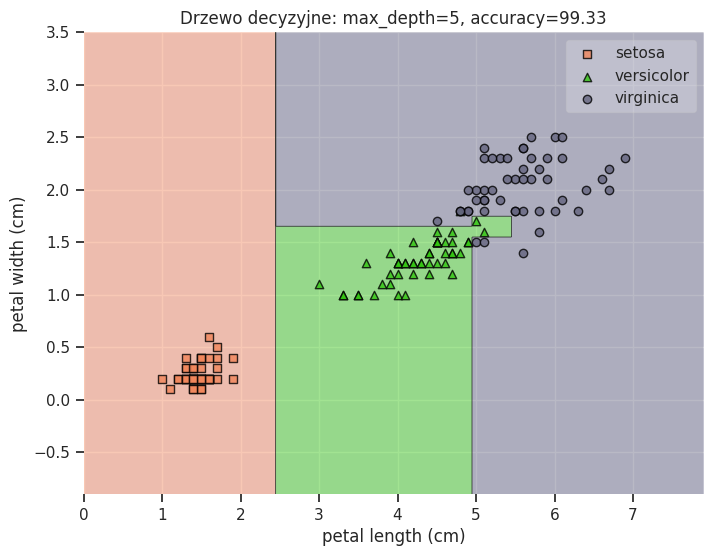

In [ ]:
make_decision_tree(max_depth=5)